In [1]:
import numpy as np
import time
import os
import shutil

import random
import pandas as pd

from pylab import *
import matplotlib.pyplot as plt
# from matplotlib_venn import *
%matplotlib inline
import seaborn as sns

from scipy import stats
from numpy.random import *

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


/opt/anaconda3/envs/nb450/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# set data

In [2]:
class probe_set:
    def __init__(self, name):
        self.ID = name
        
        self.probe_num = 0
        
        self.MYCNA_precision = []
        self.MYCNA_recall = []
        self.MYCNA_f1 = []
        self.INSS4_precision = []
        self.INSS4_recall = []
        self.INSS4_f1 = []
        self.INSS4s_precision = []
        self.INSS4s_recall = []
        self.INSS4s_f1 = []
        self.other_precision = []
        self.other_recall = []
        self.other_f1 = []
        
        self.accuracy = 0


In [3]:
pwd

'/Users/nb450/NB_ML_450K/ipynb'

In [4]:
datadir = "../data/"
outdir = "../result/"


In [5]:
for k in os.listdir(datadir+"RF/"):
    if k == ".DS_Store":
        continue
        
    df_score = pd.read_csv(datadir+"RF/"+k+"/scores.tsv", sep="\t")
    print(k, df_score.shape)
#     print(k)

4data_CGI_3UTR (100, 22)
4data_OpenChr (100, 22)
4data_DMR_RDMR (1000, 22)
4data_CGI_Body (100, 22)
4data_TSS200 (100, 22)
4data_450Kenha_CGI (100, 22)
4data_DMR_DMR (1000, 22)
4data_pha5enha (100, 22)
4data_CGI_promoter (100, 22)
4data_CGI_TSS200 (100, 22)
4data_DMR_CDMR (1000, 22)
4data_3UTR (100, 22)
4data_enha (100, 22)
4data_SNP (100, 22)
4data_shore (100, 22)
4data_promoter (100, 22)
4data_DNase (100, 22)
4data_TFBS (100, 22)
4data_shelf (100, 22)
4data_CGI (100, 22)
4data_Body (100, 22)
4data_pha5enha_CGI (100, 22)
4data_450Kenha (100, 22)
4data_DMR (100, 22)
4data_TSS (100, 22)


In [6]:
%%time
# del probe_group["enha_small.tsv"], probe_group["enha.tsv"]

ordered = ["4data_promoter", "4data_TSS200","4data_TSS","4data_Body","4data_3UTR"
           ,"4data_CGI","4data_shore","4data_shelf"
           ,"4data_CGI_promoter","4data_CGI_TSS200","4data_CGI_Body","4data_CGI_3UTR"
           ,"4data_pha5enha","4data_450Kenha","4data_pha5enha_CGI","4data_450Kenha_CGI"
           ,"4data_DMR","4data_DNase","4data_TFBS","4data_OpenChr"
          ,"4data_SNP","4data_DMR_DMR","4data_DMR_RDMR","4data_DMR_CDMR"]
probe_group = {}
for k in ordered:
# for k in os.listdir("result/RF/"):
# for k in probe_group.keys():
    probe_group[k] = probe_set(k)
    
    df = pd.read_csv(datadir+"data_matrix/"+k+".tsv.gz", sep='\t')
    probe_group[k].probe_num = df.shape[0]

    for line in open(datadir+"RF/"+k+"/scores.tsv"):
#     for line in open("result/RF/4data_"+k+"/scores.tsv"):
        l = line.split("\t")
        if l[0] == "rep":
            continue
        probe_group[k].MYCNA_precision.append(float(l[6]))
        probe_group[k].INSS4_precision.append(float(l[7]))
        probe_group[k].INSS4s_precision.append(float(l[8]))
        probe_group[k].other_precision.append(float(l[9]))
        probe_group[k].MYCNA_recall.append(float(l[10]))
        probe_group[k].INSS4_recall.append(float(l[11]))
        probe_group[k].INSS4s_recall.append(float(l[12]))
        probe_group[k].other_recall.append(float(l[13]))
        probe_group[k].MYCNA_f1.append(float(l[14]))
        probe_group[k].INSS4_f1.append(float(l[15]))
        probe_group[k].INSS4s_f1.append(float(l[16]))
        probe_group[k].other_f1.append(float(l[17]))
    
    df = pd.read_csv(datadir+"RF/"+k+"/true_count_bysample.tsv", sep='\t',header=None)
    # print(k, df[1].sum(), df[2].sum())
    probe_group[k].accuracy = df[2].sum()/df[1].sum()

    print(k, probe_group[k].probe_num, len(probe_group[k].MYCNA_precision), df[2].sum()/df[1].sum())


FileNotFoundError: [Errno 2] No such file or directory: '../data/data_matrix/4data_promoter.tsv.gz'

In [6]:
# %%time
df_simres = pd.DataFrame()
MYCNA_f1_probe_num = {}
INSS4_f1_probe_num = {}
dirs = os.listdir(datadir+"RF/")
for k in probe_group.keys():
    tmpkey = k.replace("4data_","")
    df_simres.at[tmpkey, "probe_num"] = probe_group[k].probe_num
#     print(k, probe_group[k].probe_num)
    i = 0
    MYCNA_precision = []
    MYCNA_recall = []
    MYCNA_f1 = []
    INSS4_precision = []
    INSS4_recall = []
    INSS4_f1 = []
    for line in open(datadir+"RF/"+k+"/scores.tsv"):
#     for line in open(wd+"data/RF/4data_all"+str(probe_group[k].probe_num)+"/scores.tsv"):
        l = line.split("\t")
        if l[0] == "rep":
            continue
        MYCNA_precision.append(float(l[6]))
        INSS4_precision.append(float(l[7]))
        MYCNA_recall.append(float(l[10]))
        INSS4_recall.append(float(l[11]))
        MYCNA_f1.append(float(l[14]))
        INSS4_f1.append(float(l[15]))
        i += 1
    df_simres.at[tmpkey, "MYCNA_precision"] = np.array(MYCNA_precision).mean()
    df_simres.at[tmpkey, "INSS4_precision"] = np.array(INSS4_precision).mean()
    df_simres.at[tmpkey, "MYCNA_recall"] = np.array(MYCNA_recall).mean()
    df_simres.at[tmpkey, "INSS4_recall"] = np.array(INSS4_recall).mean()
    df_simres.at[tmpkey, "MYCNA_f1"] = np.array(MYCNA_f1).mean()
    df_simres.at[tmpkey, "INSS4_f1"] = np.array(INSS4_f1).mean()
    
#     print(k,i,np.array(MYCNA_precision).mean(),np.array(INSS4_precision).mean(),np.array(MYCNA_recall).mean(),np.array(INSS4_recall).mean(),np.array(MYCNA_f1).mean(),np.array(INSS4_f1).mean())
    MYCNA_f1_probe_num[k] = MYCNA_f1
    INSS4_f1_probe_num[k] = INSS4_f1
df_simres

,probe_num,MYCNA_precision,INSS4_precision,MYCNA_recall,INSS4_recall,MYCNA_f1,INSS4_f1
promoter,78798.0,0.951701,0.785337,0.847576,0.963514,0.895506,0.865040
TSS200,58151.0,0.948650,0.776860,0.810000,0.963514,0.872429,0.859788
TSS,78798.0,0.945412,0.788909,0.846667,0.966081,0.891790,0.868241
Body,163726.0,0.938302,0.789909,0.851212,0.961486,0.891220,0.867003
3UTR,18534.0,0.951594,0.772389,0.803333,0.965000,0.869258,0.857619
CGI,138386.0,0.940176,0.765257,0.841515,0.963919,0.886715,0.852888
shore,58921.0,0.942962,0.786138,0.867576,0.965000,0.902152,0.866088
shelf,23349.0,0.943205,0.786111,0.834848,0.966486,0.883970,0.866648
CGI_promoter,26416.0,0.933059,0.682931,0.756667,0.972162,0.833788,0.801890
CGI_TSS200,36313.0,0.928343,0.691801,0.794848,0.967838,0.854533,0.806546


In [21]:
df_beta = pd.read_csv(datadir+"4data_all.tsv.gz", index_col=0)
df_beta = df_beta.dropna()
df_anno = pd.read_csv(datadir+"epic_anno.csv.gz", index_col=0, skiprows=7)
# df_anno = pd.read_csv(datadir+"MethylationEPIC_v-1-0_B4.csv", index_col=0, skiprows=7)
df_anno["Relation_to_UCSC_CpG_Island"] = df_anno["Relation_to_UCSC_CpG_Island"].fillna("-1")

/var/folders/8z/hm83kqdj4wq6jxvn_2rnzlp00000gn/T/ipykernel_2532/3791751457.py:3: DtypeWarning: Columns (2,4,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_anno = pd.read_csv(datadir+"MethylationEPIC_v-1-0_B4.csv", index_col=0, skiprows=7)


In [22]:
df_beta_var = df_beta.var(axis=1)
df_anno["Relation_to_UCSC_CpG_Island"] = df_anno["Relation_to_UCSC_CpG_Island"].fillna("-1")
df_anno["UCSC_RefGene_Group"] = df_anno["UCSC_RefGene_Group"].fillna("-1")

In [23]:
df_beta_var.head()

ID_REF
cg07881041    0.016214
cg18478105    0.000305
cg23229610    0.006319
cg03513874    0.035688
cg09835024    0.000297
dtype: float64

In [24]:
# %%time
df_sum = pd.DataFrame()
# df_simres = pd.DataFrame()
MYCNA_f1_probe_num = {}
INSS4_f1_probe_num = {}
dirs = os.listdir(datadir+"RF/")
for k in probe_group.keys():
    tmpkey = k.replace("4data_","")
    df_sum.at[tmpkey, "probe_num"] = probe_group[k].probe_num
#     print(k, probe_group[k].probe_num)
    df_tmp = pd.read_csv(datadir+"RF/"+k+"/scores.tsv", sep="\t")
    df_sum.at[tmpkey, "A_f1"] = df_tmp["MYCNA_f1"].mean()
    df_sum.at[tmpkey, "B_f1"] = df_tmp["4_f1"].mean()
    df_sum.at[tmpkey, "accuracy"] = probe_group[k].accuracy
    
df_sum

,probe_num,A_f1,B_f1,accuracy
promoter,78798.0,0.895506,0.865040,0.789530
TSS200,58151.0,0.872429,0.859788,0.783893
TSS,78798.0,0.891790,0.868241,0.794765
Body,163726.0,0.891220,0.867003,0.785906
3UTR,18534.0,0.869258,0.857619,0.779060
CGI,138386.0,0.886715,0.852888,0.775638
shore,58921.0,0.902152,0.866088,0.790805
shelf,23349.0,0.883970,0.866648,0.786376
CGI_promoter,26416.0,0.833788,0.801890,0.724698
CGI_TSS200,36313.0,0.854533,0.806546,0.731946


In [25]:
df_anno = df_anno.loc[df_anno["Methyl450_Loci"]==True]

In [26]:
probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("TSS200")].index
df_sum.at["TSS200", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("TSS")].index
df_sum.at["TSS", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("TSS") | df_anno["UCSC_RefGene_Group"].str.contains("1stExon") | df_anno["UCSC_RefGene_Group"].str.contains("5'UTR")].index
df_sum.at["promoter", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("Body")].index
df_sum.at["Body", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("3'UTR")].index
df_sum.at["3UTR", "var"] = df_beta_var[probes].mean()

probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("TSS200") & df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island")].index
df_sum.at["CGI_TSS200", "var"] = df_beta_var[probes].mean()
# probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("TSS") | df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island")].index
# df_sum.at["CGI_TSS1500", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[(df_anno["UCSC_RefGene_Group"].str.contains("TSS") | df_anno["UCSC_RefGene_Group"].str.contains("1stExon")) & df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island")].index
df_sum.at["CGI_promoter", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("Body") & df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island")].index
df_sum.at["CGI_Body", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[df_anno["UCSC_RefGene_Group"].str.contains("3'UTR") & df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island")].index
df_sum.at["CGI_3UTR", "var"] = df_beta_var[probes].mean()

probes = df_anno.loc[df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island")].index
df_sum.at["CGI", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island") | df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Shore")].index
df_sum.at["shore", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island") | df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Shore") | df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Shelf")].index
df_sum.at["shelf", "var"] = df_beta_var[probes].mean()

probes = df_anno.loc[~df_anno["Phantom5_Enhancers"].isnull()].index
df_sum.at["pha5enha", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[~df_anno["450k_Enhancer"].isnull()].index
df_sum.at["450Kenha", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[~df_anno["DMR"].isnull()].index
df_sum.at["DMR", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[~df_anno["DNase_Hypersensitivity_NAME"].isnull()].index
df_sum.at["DNase", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[~df_anno["TFBS_NAME"].isnull()].index
df_sum.at["TFBS", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[~df_anno["OpenChromatin_NAME"].isnull()].index
df_sum.at["OpenChr", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[~df_anno["SNP_ID"].isnull()].index
df_sum.at["SNP", "var"] = df_beta_var[probes].mean()

probes = df_anno.loc[(~df_anno["Phantom5_Enhancers"].isnull()) & (df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island"))].index
df_sum.at["pha5enha_CGI", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[(~df_anno["450k_Enhancer"].isnull()) & (df_anno["Relation_to_UCSC_CpG_Island"].str.contains("Island"))].index
df_sum.at["450Kenha_CGI", "var"] = df_beta_var[probes].mean()

probes = df_anno.loc[(~df_anno["DMR"].isnull()) & (df_anno["DMR"]=="DMR")].index
df_sum.at["DMR_DMR", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[(~df_anno["DMR"].isnull()) & (df_anno["DMR"]=="RDMR")].index
df_sum.at["DMR_RDMR", "var"] = df_beta_var[probes].mean()
probes = df_anno.loc[(~df_anno["DMR"].isnull()) & (df_anno["DMR"]=="CDMR")].index
df_sum.at["DMR_CDMR", "var"] = df_beta_var[probes].mean()



df_sum["probe_num"] = df_sum["probe_num"].astype(int)
df_sum

,probe_num,A_f1,B_f1,accuracy,var
promoter,78798,0.895506,0.865040,0.789530,0.009645
TSS200,58151,0.872429,0.859788,0.783893,0.006880
TSS,78798,0.891790,0.868241,0.794765,0.009229
Body,163726,0.891220,0.867003,0.785906,0.013660
3UTR,18534,0.869258,0.857619,0.779060,0.014229
CGI,138386,0.886715,0.852888,0.775638,0.007392
shore,58921,0.902152,0.866088,0.790805,0.009839
shelf,23349,0.883970,0.866648,0.786376,0.010768
CGI_promoter,26416,0.833788,0.801890,0.724698,0.003825
CGI_TSS200,36313,0.854533,0.806546,0.731946,0.003136


# probe number and f1-score

In [28]:
# del probe_group["enha_small.tsv"], probe_group["enha.tsv"]

ordered = ["4data_promoter", "4data_TSS200","4data_TSS","4data_Body","4data_3UTR"
           ,"4data_CGI","4data_shore","4data_shelf"
           ,"4data_CGI_promoter","4data_CGI_TSS200","4data_CGI_Body","4data_CGI_3UTR"
           ,"4data_pha5enha","4data_450Kenha","4data_pha5enha_CGI","4data_450Kenha_CGI"
           ,"4data_DMR","4data_DNase","4data_TFBS","4data_OpenChr"
          ,"4data_SNP"]
probe_group_sim = {}
# for k in [k.replace("4data_all","") for k in os.listdir(wd+"RF_sim/NB_infi_20190815_probenum_simulation_selper/result/RF_bak190313/") if k != "4data_all"]:
for k in [10000,20000,30000,40000,50000,100000,150000,200000,250000,300000,350000]:
    probe_group_sim[k] = probe_set(k)
    probe_group_sim[k].probe_num = int(k)

#     for line in open(wd+"RF_sim/NB_infi_20190813_probenum_simulation/result/RF/4data_all"+str(k)+"/scores.tsv"):
    for line in open(datadir+"RF_sim/NB_infi_20190815_probenum_simulation_selper/result/RF/4data_all"+str(k)+"/scores.tsv"):
#     for line in open("result/RF/4data_"+k+"/scores.tsv"):
        l = line.split("\t")
        if l[0] == "rep":
            continue
        probe_group_sim[k].MYCNA_precision.append(float(l[6]))
        probe_group_sim[k].INSS4_precision.append(float(l[7]))
        probe_group_sim[k].INSS4s_precision.append(float(l[8]))
        probe_group_sim[k].other_precision.append(float(l[9]))
        probe_group_sim[k].MYCNA_recall.append(float(l[10]))
        probe_group_sim[k].INSS4_recall.append(float(l[11]))
        probe_group_sim[k].INSS4s_recall.append(float(l[12]))
        probe_group_sim[k].other_recall.append(float(l[13]))
        probe_group_sim[k].MYCNA_f1.append(float(l[14]))
        probe_group_sim[k].INSS4_f1.append(float(l[15]))
        probe_group_sim[k].INSS4s_f1.append(float(l[16]))
        probe_group_sim[k].other_f1.append(float(l[17]))
    print(k, probe_group_sim[k].probe_num, len(probe_group_sim[k].MYCNA_precision))


10000 10000 1000
20000 20000 1000
30000 30000 1000
40000 40000 1000
50000 50000 1000
100000 100000 1000
150000 150000 1000
200000 200000 1000
250000 250000 1000
300000 300000 1000
350000 350000 1000


In [29]:
# del probe_group["enha_small.tsv"], probe_group["enha.tsv"]

ordered = ["4data_promoter", "4data_TSS200","4data_TSS","4data_Body","4data_3UTR"
           ,"4data_CGI","4data_shore","4data_shelf"
           ,"4data_CGI_promoter","4data_CGI_TSS200","4data_CGI_Body","4data_CGI_3UTR"
           ,"4data_pha5enha","4data_450Kenha","4data_pha5enha_CGI","4data_450Kenha_CGI"
           ,"4data_DMR","4data_DNase","4data_TFBS","4data_OpenChr"
          ,"4data_SNP"]
probe_group_sel = {}
for k in [10000,20000,30000,40000,50000,100000,150000,200000,250000,300000,350000]:
    probe_group_sel[k] = probe_set(k)
    probe_group_sel[k].probe_num = k

    for line in open(datadir+"RF_sim/NB_infi_20190815_probenum_simulation_selper/result/RF/4data_all"+str(k)+"_selper/scores.tsv"):
#     for line in open(wd+"/RF/4data_all"+str(k)+"_selper/scores.tsv"):
#     for line in open("result/RF/4data_"+k+"/scores.tsv"):
        l = line.split("\t")
        if l[0] == "rep":
            continue
        probe_group_sel[k].MYCNA_precision.append(float(l[6]))
        probe_group_sel[k].INSS4_precision.append(float(l[7]))
        probe_group_sel[k].INSS4s_precision.append(float(l[8]))
        probe_group_sel[k].other_precision.append(float(l[9]))
        probe_group_sel[k].MYCNA_recall.append(float(l[10]))
        probe_group_sel[k].INSS4_recall.append(float(l[11]))
        probe_group_sel[k].INSS4s_recall.append(float(l[12]))
        probe_group_sel[k].other_recall.append(float(l[13]))
        probe_group_sel[k].MYCNA_f1.append(float(l[14]))
        probe_group_sel[k].INSS4_f1.append(float(l[15]))
        probe_group_sel[k].INSS4s_f1.append(float(l[16]))
        probe_group_sel[k].other_f1.append(float(l[17]))
    print(k, probe_group_sel[k].probe_num, len(probe_group_sel[k].MYCNA_precision))


10000 10000 10000
20000 20000 10000
30000 30000 10000
40000 40000 10000
50000 50000 10000
100000 100000 1000
150000 150000 1000
200000 200000 1000
250000 250000 1000
300000 300000 1000
350000 350000 1000


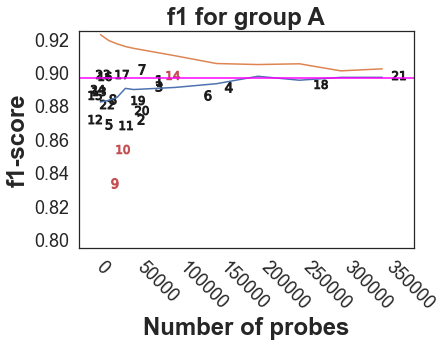

In [43]:
ordered = ["4data_promoter", "4data_TSS200","4data_TSS","4data_Body","4data_3UTR"
           ,"4data_CGI","4data_shore","4data_shelf"
           ,"4data_CGI_promoter","4data_CGI_TSS200","4data_CGI_Body","4data_CGI_3UTR"
           ,"4data_pha5enha","4data_450Kenha","4data_pha5enha_CGI","4data_450Kenha_CGI"
           ,"4data_DMR","4data_DNase","4data_TFBS","4data_OpenChr"
          ,"4data_SNP","4data_DMR_DMR","4data_DMR_RDMR","4data_DMR_CDMR"]

i=1
for k in ordered:
    if i == 9:
        plt.scatter(probe_group[k].probe_num, np.array(probe_group[k].MYCNA_f1).mean(), c="r", label=k.replace("4data_",""), marker="$"+str(i)+"$", s=100)
    elif i == 10 or i == 14:
        plt.scatter(probe_group[k].probe_num, np.array(probe_group[k].MYCNA_f1).mean(), c="r", label=k.replace("4data_",""), marker="$"+str(i)+"$", s=200)
    elif i > 9:
        plt.scatter(probe_group[k].probe_num, np.array(probe_group[k].MYCNA_f1).mean(), c="k", label=k.replace("4data_",""), marker="$"+str(i)+"$", s=200)
    else:
        plt.scatter(probe_group[k].probe_num, np.array(probe_group[k].MYCNA_f1).mean(), c="k", label=k.replace("4data_",""), marker="$"+str(i)+"$", s=100)
    i+=1
#     print(k, probe_group[k].probe_num, np.array(probe_group[k].amp_f1).mean(), np.array(probe_group[k].noamp_f1).mean())
#     plt.scatter(probe_group[k].probe_num, np.array(probe_group[k].MYCNA_f1).mean())
#     plt.text(probe_group[k].probe_num, np.array(probe_group[k].MYCNA_f1).mean(),k.replace("4data_",""))
x = []
y = []
for k in [10000,20000,30000,40000,50000,100000,150000,200000,250000,300000,350000]:
    x.append(probe_group_sim[k].probe_num)
    y.append(np.array(probe_group_sim[k].MYCNA_f1).mean())
plt.plot(x,y,label="random")
x = []
y = []
for k in [10000,20000,30000,40000,50000,100000,150000,200000,250000,300000,350000]:
    x.append(probe_group_sel[k].probe_num)
    y.append(np.array(probe_group_sel[k].MYCNA_f1).mean())
plt.plot(x,y,label="selper")

# plt.legend()
plt.title("f1 for group A", weight="bold", size = 24)
plt.axhline(0.897, ls = "-", color = "magenta")
plt.ylim([0.795, 0.925])
plt.xticks(ha="left", rotation=-45,size=18)
plt.yticks(size=18)
plt.xlabel("Number of probes", weight="bold", size = 24)
plt.ylabel("f1-score", weight="bold", size = 24)
# plt.savefig("../fig/MYCNA_f1_selper_20211115.pdf", bbox_inches="tight")
plt.show()


Text(0, 0.5, 'f1-score')

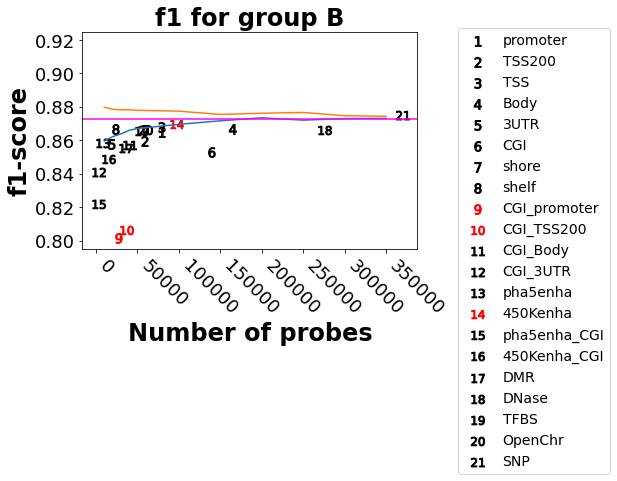

In [30]:

i=1
for k in ordered:
    if i == 9:
        plt.scatter(probe_group[k].probe_num, np.array(probe_group[k].INSS4_f1).mean(), c="r", label=k.replace("4data_",""), marker="$"+str(i)+"$", s=100)
    elif i == 10 or i == 14:
        plt.scatter(probe_group[k].probe_num, np.array(probe_group[k].INSS4_f1).mean(), c="r", label=k.replace("4data_",""), marker="$"+str(i)+"$", s=200)
    elif i > 9:
        plt.scatter(probe_group[k].probe_num, np.array(probe_group[k].INSS4_f1).mean(), c="k", label=k.replace("4data_",""), marker="$"+str(i)+"$", s=200)
    else:
        plt.scatter(probe_group[k].probe_num, np.array(probe_group[k].INSS4_f1).mean(), c="k", label=k.replace("4data_",""), marker="$"+str(i)+"$", s=100)
    i+=1
plt.legend(bbox_to_anchor=(1.1, 1.05), loc='upper left', fontsize=14)
x = []
y = []
for k in [10000,20000,30000,40000,50000,100000,150000,200000,250000,300000,350000]:
    x.append(probe_group_sim[k].probe_num)
    y.append(np.array(probe_group_sim[k].INSS4_f1).mean())
plt.plot(x,y,label="random")
x = []
y = []
for k in [10000,20000,30000,40000,50000,100000,150000,200000,250000,300000,350000]:
    x.append(probe_group_sel[k].probe_num)
    y.append(np.array(probe_group_sel[k].INSS4_f1).mean())
plt.plot(x,y,label="selper")

plt.title("f1 for group B", weight="bold", size = 24)
plt.axhline(0.873, ls = "-", color = "magenta")
plt.ylim([0.795, 0.925])
plt.xticks(ha="left", rotation=-45,size=18)
plt.yticks(size=18)
plt.xlabel("Number of probes", weight="bold", size = 24)
plt.ylabel("f1-score", weight="bold", size = 24)
# plt.savefig("/media/sugino/HDD2/project/machine_learning/NB_RF/NB_infi_20190806_probe_character/fig/INSS4_f1_selper2.pdf", bbox_inches="tight")
# plt.savefig("/Users/rsugino/Dropbox/shared/NB450K_draft/20191223_makefigure/fig/B_f1_selper2_20211115.pdf", bbox_inches="tight")


# variance and prediction ability

In [31]:
for i,items in df_sum.iterrows():
    df_tmp = pd.read_csv(datadir+"RF_sim/NB_infi_20190813_probenum_simulation/result/RF/4data_all"+df_sum.at[i,"probe_num"].astype("str")+"/scores.tsv", sep="\t", index_col=0)
    print(i, df_tmp["MYCNA_f1"].mean())
    df_sum.at[i.replace("4data_",""), "A_f1_sim"] = df_tmp["MYCNA_f1"].mean()
    df_sum.at[i.replace("4data_",""), "A_f1_sim_ratio"] = df_sum.at[i.replace("4data_",""), "A_f1"]/df_tmp["MYCNA_f1"].mean()
    df_sum.at[i.replace("4data_",""), "B_f1_sim"] = df_tmp["4_f1"].mean()
    df_sum.at[i.replace("4data_",""), "B_f1_sim_ratio"] = df_sum.at[i.replace("4data_",""), "B_f1"]/df_tmp["4_f1"].mean()

df_sum

promoter 0.8952551294874604
TSS200 0.8972851007985129
TSS 0.8952551294874604
Body 0.895764734097821
3UTR 0.8823403900930319
CGI 0.8973465811528978
shore 0.8830869976844743
shelf 0.8864954718625324
CGI_promoter 0.8842173531536495
CGI_TSS200 0.8830678086502766
CGI_Body 0.8861605341472462
CGI_3UTR 0.8710646924427834
pha5enha 0.875513666250088
450Kenha 0.8898671367385186
pha5enha_CGI 0.8735746074090209
450Kenha_CGI 0.8819832974517324
DMR 0.8870392468372483
DNase 0.8941594031114127
TFBS 0.8920348340298603
OpenChr 0.8948379663046354
SNP 0.8932322334683169
DMR_DMR 0.8767435606597007
DMR_RDMR 0.8773593660594627
DMR_CDMR 0.8762030305102487


,probe_num,A_f1,B_f1,accuracy,var,A_f1_sim,A_f1_sim_ratio,B_f1_sim,B_f1_sim_ratio
promoter,78798,0.895506,0.865040,0.789530,0.009645,0.895255,1.000280,0.869697,0.994646
TSS200,58151,0.872429,0.859788,0.783893,0.006880,0.897285,0.972299,0.870673,0.987498
TSS,78798,0.891790,0.868241,0.794765,0.009229,0.895255,0.996130,0.869697,0.998326
Body,163726,0.891220,0.867003,0.785906,0.013660,0.895765,0.994926,0.871271,0.995101
3UTR,18534,0.869258,0.857619,0.779060,0.014229,0.882340,0.985174,0.862516,0.994322
CGI,138386,0.886715,0.852888,0.775638,0.007392,0.897347,0.988152,0.870916,0.979300
shore,58921,0.902152,0.866088,0.790805,0.009839,0.883087,1.021589,0.869341,0.996257
shelf,23349,0.883970,0.866648,0.786376,0.010768,0.886495,0.997151,0.862840,1.004414
CGI_promoter,26416,0.833788,0.801890,0.724698,0.003825,0.884217,0.942967,0.863387,0.928772
CGI_TSS200,36313,0.854533,0.806546,0.731946,0.003136,0.883068,0.967687,0.863818,0.933700


Text(0.018911225975342828, 0.93, '$p=0.0001$')

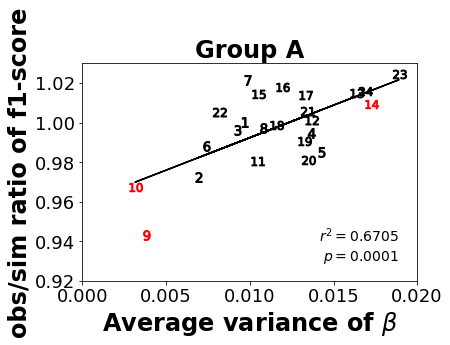

In [35]:
sns.set_style()
# sns.set(style="white")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

i=1
for k in df_sum.index:
    if i == 9:
        plt.scatter(df_sum.loc[k, "var"], df_sum.loc[k, "A_f1_sim_ratio"], c="r", marker="$"+str(i)+"$", s=100)
    elif i == 10 or i == 14:
        plt.scatter(df_sum.loc[k, "var"], df_sum.loc[k, "A_f1_sim_ratio"], c="r", marker="$"+str(i)+"$", s=200)
    elif i > 9:
        plt.scatter(df_sum.loc[k, "var"], df_sum.loc[k, "A_f1_sim_ratio"], c="k", marker="$"+str(i)+"$", s=200)
    else:
        plt.scatter(df_sum.loc[k, "var"], df_sum.loc[k, "A_f1_sim_ratio"], c="k", marker="$"+str(i)+"$", s=100)
    i+=1
plt.xlim(0.001,0.0190)
ax.set_xlabel("Average variance of "+r"$\beta$", size=24, weight="bold")

ax.set_ylabel("obs/sim ratio of f1-score", size=24, weight="bold")
plt.xticks(np.arange(0,0.021,0.005), size=18)
plt.yticks(size=18)

plt.title("Group A", size=24, weight="bold")
plt.ylim(0.92,1.03)

lr = LinearRegression()
X = df_sum["var"]
Y = df_sum["A_f1_sim_ratio"]

lr.fit(np.array(X).reshape(-1, 1),np.array(Y).reshape(-1, 1))
plt.plot(np.array(X).reshape(-1, 1), lr.predict(np.array(X).reshape(-1, 1)), color = 'k')
plt.text(X.max(), 0.94, r"$r^2=0.6705$", ha="right", fontsize=14)
# p = pd.DataFrame([np.corrcoef([X,Y.sample(frac=1)])[0][1] for i in range(10000)])
plt.text(X.max(), 0.93, r"$p=0.0001$", ha="right", fontsize=14)


# plt.savefig(wd+"fig/A_f1_varf1_20211115.pdf.pdf", bbox_inches="tight")



Text(0.018911225975342828, 0.93, '$p=0.0001$')

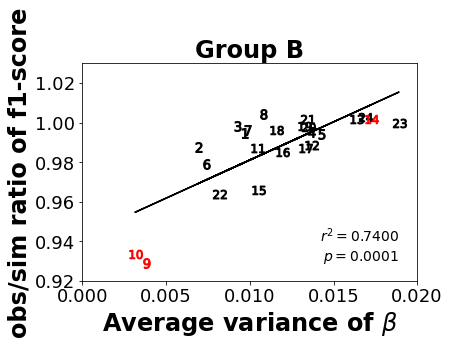

In [36]:
sns.set_style()
# sns.set(style="white")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

i=1
for k in df_sum.index:
    if i == 9:
        plt.scatter(df_sum.loc[k, "var"], df_sum.loc[k, "B_f1_sim_ratio"], c="r", marker="$"+str(i)+"$", s=100)
    elif i == 10:
        plt.scatter(df_sum.loc[k, "var"], df_sum.loc[k, "B_f1_sim_ratio"], c="r", marker="$"+str(i)+"$", s=200)
    elif i == 14:
        i+=1
        continue
    elif i > 9:
        plt.scatter(df_sum.loc[k, "var"], df_sum.loc[k, "B_f1_sim_ratio"], c="k", marker="$"+str(i)+"$", s=200)
    else:
        plt.scatter(df_sum.loc[k, "var"], df_sum.loc[k, "B_f1_sim_ratio"], c="k", marker="$"+str(i)+"$", s=100)
    i+=1
    
plt.scatter(df_sum.loc[df_sum.index[13], "var"], df_sum.loc[df_sum.index[13], "B_f1_sim_ratio"], c="r", marker="$"+str(14)+"$", s=200)

plt.xlim(0.001,0.0190)
ax.set_xlabel("Average variance of "+r"$\beta$", size=24, weight="bold")

ax.set_ylabel("obs/sim ratio of f1-score", size=24, weight="bold")
plt.xticks(np.arange(0,0.021,0.005), size=18)
plt.yticks(size=18)

plt.title("Group B", size=24, weight="bold")
plt.ylim(0.92,1.03)

lr = LinearRegression()
X = df_sum["var"]
Y = df_sum["B_f1_sim_ratio"]

lr.fit(np.array(X).reshape(-1, 1),np.array(Y).reshape(-1, 1))
plt.plot(np.array(X).reshape(-1, 1), lr.predict(np.array(X).reshape(-1, 1)), color = 'k')
plt.text(X.max(), 0.94, r"$r^2=0.7400$", ha="right", fontsize=14)
p = pd.DataFrame([np.corrcoef([X,Y.sample(frac=1)])[0][1] for i in range(10000)])
plt.text(X.max(), 0.93, r"$p=0.0001$", ha="right", fontsize=14)

# plt.savefig(wd+"fig/B_f1_varf1_20211115.pdf", bbox_inches="tight")


# measured by accuracy

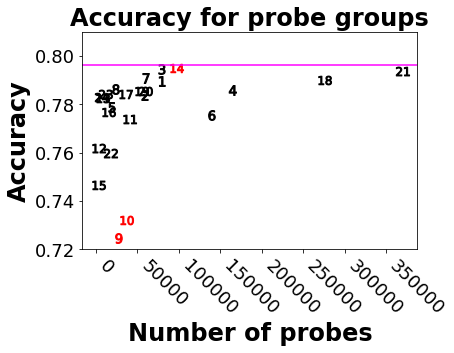

In [37]:
sns.set_style()
# sns.set(style="white")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

i=1
for k in df_sum.index:
    if i == 9:
#         plt.scatter(probe_group[k].probe_num, np.array(probe_group[k].INSS4_f1).mean(), c="r", label=k.replace("4data_",""), marker="$"+str(i)+"$", s=100)
        plt.scatter(df_sum.loc[k, "probe_num"], df_sum.loc[k, "accuracy"], c="r", marker="$"+str(i)+"$", s=100)
    elif i == 10 or i == 14:
#         plt.scatter(probe_group[k].probe_num, np.array(probe_group[k].INSS4_f1).mean(), c="r", label=k.replace("4data_",""), marker="$"+str(i)+"$", s=200)
        plt.scatter(df_sum.loc[k, "probe_num"], df_sum.loc[k, "accuracy"], c="r", marker="$"+str(i)+"$", s=200)
    elif i > 9:
        plt.scatter(df_sum.loc[k, "probe_num"], df_sum.loc[k, "accuracy"], c="k", marker="$"+str(i)+"$", s=200)
    else:
        plt.scatter(df_sum.loc[k, "probe_num"], df_sum.loc[k, "accuracy"], c="k", marker="$"+str(i)+"$", s=100)
    i+=1
ax.set_xlabel("Number of probes", size=24, weight="bold")

ax.set_ylabel("Accuracy", size=24, weight="bold")
plt.xticks([0,50000,100000,150000,200000,250000,300000,350000], ha="left", rotation=-45,size=18)
plt.yticks(size=18)

plt.title("Accuracy for probe groups", size=24, weight="bold")
plt.ylim(0.72,0.81)

plt.axhline(118659/149000, ls = "-", color = "magenta")

# plt.savefig("/Users/rsugino/Desktop/accuracy_probe_20211115.pdf", bbox_inches="tight")



Text(0.018911225975342828, 0.73, '$p=0.0024$')

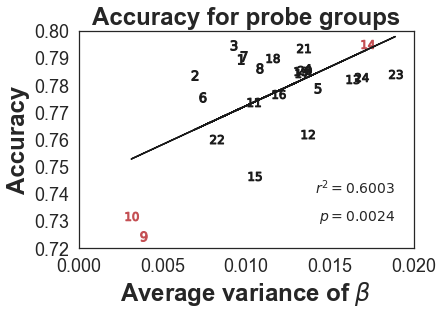

In [38]:
sns.set_style()
sns.set(style="white")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

i=1
for k in df_sum.index:
    if i == 9:
        plt.scatter(df_sum.loc[k, "var"], df_sum.loc[k, "accuracy"], c="r", marker="$"+str(i)+"$", s=100)
    elif i == 10 or i == 14:
        plt.scatter(df_sum.loc[k, "var"], df_sum.loc[k, "accuracy"], c="r", marker="$"+str(i)+"$", s=200)
    elif i > 9:
        plt.scatter(df_sum.loc[k, "var"], df_sum.loc[k, "accuracy"], c="k", marker="$"+str(i)+"$", s=200)
    else:
        plt.scatter(df_sum.loc[k, "var"], df_sum.loc[k, "accuracy"], c="k", marker="$"+str(i)+"$", s=100)
    i+=1
plt.xlim(0.001,0.0190)
ax.set_xlabel("Average variance of "+r"$\beta$", size=24, weight="bold")

ax.set_ylabel("Accuracy", size=24, weight="bold")
plt.xticks(np.arange(0,0.021,0.005), size=18)
plt.yticks(size=18)

plt.title("Accuracy for probe groups", size=24, weight="bold")
plt.ylim(0.72,0.8)


lr = LinearRegression()
X = df_sum["var"]
Y = df_sum["accuracy"]

lr.fit(np.array(X).reshape(-1, 1),np.array(Y).reshape(-1, 1))
plt.plot(np.array(X).reshape(-1, 1), lr.predict(np.array(X).reshape(-1, 1)), color = 'k')
plt.text(X.max(), 0.74, r"$r^2=0.6003$", ha="right", fontsize=14)
p = pd.DataFrame([np.corrcoef([X,Y.sample(frac=1)])[0][1] for i in range(10000)])
plt.text(X.max(), 0.73, r"$p=0.0024$", ha="right", fontsize=14)

# plt.savefig("/Users/rsugino/Desktop/accuracy_varf1_20211115.pdf", bbox_inches="tight")

